In [1]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
from random import sample
import math
from heapq import merge
from random import *
import secrets
from scipy.stats import spearmanr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
summary_dir = '/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/'
summary_files = [f for f in listdir(summary_dir)]

In [3]:
tps = [x / 10.0 for x in range(5, 55, 5)]
tps

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:

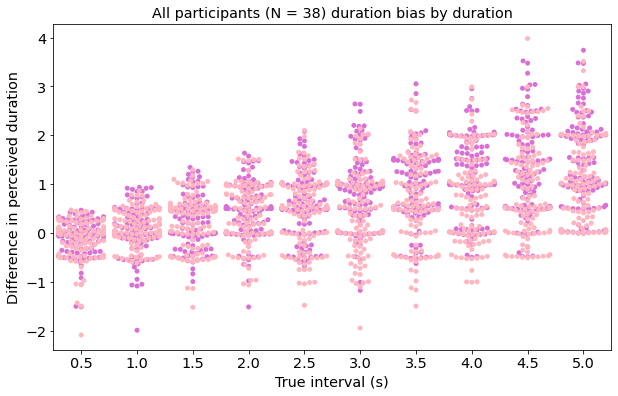

In [4]:
c_clr = '#FFB6C1'
b_clr = '#DA70D6'

fig, ax = plt.subplots(figsize=(10, 6))
df = pd.read_csv(summary_dir + 'emoscene_combined_csv.csv')
pt = (df["participant"].unique())
totalpts = len(pt)
tst = df.sort_values(by=['dur'])
cont = tst[tst["condition"] == "continious"]
c_tp = cont["dur"]
c_resp_diff = (cont["resp_diff"])
c_abs_resp = abs(cont["resp_diff"])
bdry = tst[tst["condition"] == "boundary"]
b_tp = bdry["dur"]
b_resp_diff = (bdry["resp_diff"])
b_abs_resp = abs(bdry["resp_diff"])
#ax.scatter(c_tp, c_resp_diff)
#ax.scatter(b_tp, b_resp_diff)

ax = plt.subplot(111)
w = 0.3
ofst = 0.15
ax = sns.swarmplot(b_tp, b_resp_diff, color= b_clr)
ax = sns.swarmplot(c_tp, c_resp_diff, color= c_clr)

plt.yticks(fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.xlabel('True interval (s)', fontsize = "x-large")
plt.ylabel('Difference in perceived duration', fontsize = "x-large")
plt.title("All participants (N = %s) duration bias by duration"%totalpts, fontsize = "x-large")
#ax.bar(c_tp, c_resp_diff, width=w, color= c_clr, align='center')
#ax.bar(b_tp +w, b_resp_diff, width=w, color= b_clr, align='center')
#ax.bar(x+w, k, width=w, color='r', align='center')
#ax.xaxis_date()
#ax.autoscale(tight=True)

plt.show()

C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:

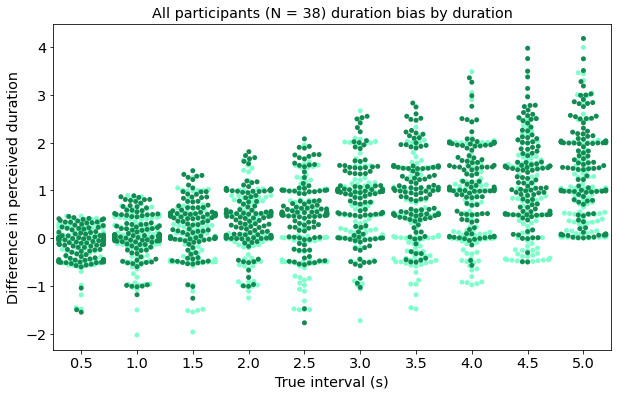

In [5]:
c_clr = '#7fffcc'
b_clr = '#138a52'

fig, ax = plt.subplots(figsize=(10, 6))
df = pd.read_csv(summary_dir + 'emoscene_combined_csv.csv')
pt = (df["participant"].unique())
totalpts = len(pt)
tst = df.sort_values(by=['dur'])
cont = tst[tst["condition"] == "Negcont"]
c_tp = cont["dur"]
c_resp_diff = (cont["resp_diff"])
c_abs_resp = abs(cont["resp_diff"])
bdry = tst[tst["condition"] == "Negbdr"]
b_tp = bdry["dur"]
b_resp_diff = (bdry["resp_diff"])
b_abs_resp = abs(bdry["resp_diff"])
#ax.scatter(c_tp, c_resp_diff)
#ax.scatter(b_tp, b_resp_diff)

ax = plt.subplot(111)
w = 0.3
ofst = 0.15
ax = sns.swarmplot(c_tp, c_resp_diff, color= c_clr)
ax = sns.swarmplot(b_tp, b_resp_diff, color= b_clr)

plt.yticks(fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.xlabel('True interval (s)', fontsize = "x-large")
plt.ylabel('Difference in perceived duration', fontsize = "x-large")
plt.title("All participants (N = %s) duration bias by duration"%totalpts, fontsize = "x-large")
#ax.bar(c_tp, c_resp_diff, width=w, color= c_clr, align='center')
#ax.bar(b_tp +w, b_resp_diff, width=w, color= b_clr, align='center')
#ax.bar(x+w, k, width=w, color='r', align='center')
#ax.xaxis_date()
#ax.autoscale(tight=True)

plt.show()

## for ANOVA interaction

In [4]:
anova_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/emoscene_combined_csv.csv')
anova_wo_catch = anova_csv[anova_csv["condition"]!= "catch"]
anova_wo_catch.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/r_analysis/emo_dur_anova.csv')

C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

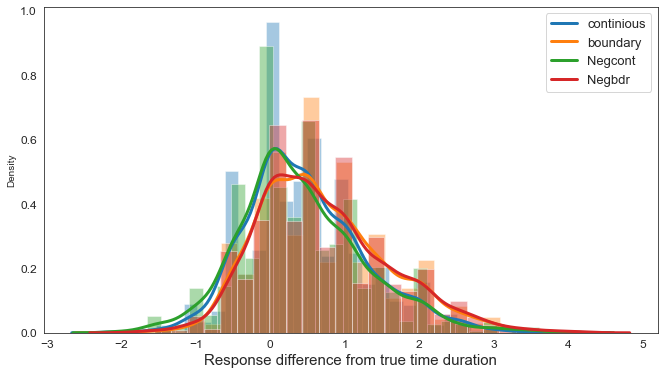

In [5]:
sns.set_style("white")
plt.figure(figsize=(11, 6))

for name in ['continious', 'boundary', 'Negcont', 'Negbdr']:
    sns.distplot(anova_wo_catch[anova_wo_catch.color==name].resp_diff, kde_kws=dict(linewidth=3))
    
plt.legend(['continious', 'boundary', 'Negcont', 'Negbdr'], fontsize=13)
plt.xlabel('Response difference from true time duration', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [2]:
tst_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/r_analysis/emo_dur_anova.csv')
tst_sort = tst_csv.sort_values(["dur"])
tst_sort

,Unnamed: 0,Unnamed: 0.1,codeJS_started,codeJS_stopped,participant,session,date,expName,psychopyVersion,OS,...,key_resp_11_duration,the_end_started,the_end_stopped,key_resp_16_keys,key_resp_16_rt,key_resp_16_duration,rho,p_value,zscr,resp_diff
3190,3509,101,NaN,NaN,A6JKKANO7F4KD,1,2023-12-19_10h56.51.428,emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.949908,1.591727e-67,1.830840,-0.199876
1461,1610,50,NaN,NaN,A2MUCL20GTQJA0,1,2023-12-19_10h09.48.379,emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.940031,1.391656e-62,1.738313,0.272135
3328,3660,120,NaN,NaN,A7204W9E8IR1R,1,2023-12-19_16h08.11.474,emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.797771,2.387555e-30,1.092451,-1.500000
1475,1625,65,NaN,NaN,A2MUCL20GTQJA0,1,2023-12-19_10h09.48.379,emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.940031,1.391656e-62,1.738313,0.233073
457,502,130,NaN,NaN,A1YSYI926BBOHW,1,2023-12-19_09h46.31.800,emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.916781,1.156146e-53,1.568462,-0.062548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,2284,64,NaN,NaN,A3G55RJTW3BSGM,1,2023-12-20_14h40.01.126,emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.904252,6.961944e-50,1.495060,2.907407
3185,3503,95,NaN,NaN,A6JKKANO7F4KD,1,2023-12-19_10h56.51.428,emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.949908,1.591727e-67,1.830840,1.592997
4154,4571,107,NaN,NaN,AOAZMLP27GD81,1,2023-12-19_14h28.37.529,emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.915438,3.132129e-53,1.560105,0.018519
3193,3512,104,NaN,NaN,A6JKKANO7F4KD,1,2023-12-19_10h56.51.428,emoscene_task,2023.2.2,Win32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.949908,1.591727e-67,1.830840,1.602253


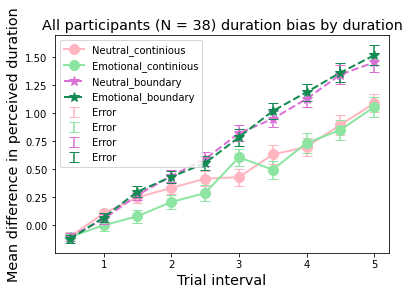

In [7]:
tpts = len(tst_sort.participant.unique())
intrvls = tst_sort.dur.unique()
Ncont = tst_sort.loc[tst_sort['condition'] == 'continious']
Econt = tst_sort.loc[tst_sort['condition'] == 'Negcont']
Nbdry = tst_sort.loc[tst_sort['condition'] == 'boundary']
Ebdry = tst_sort.loc[tst_sort['condition'] == 'Negbdr']

neu_cont = Ncont.groupby('dur')['resp_diff'].mean()
emo_cont = Econt.groupby('dur')['resp_diff'].mean()
neu_bdry = Nbdry.groupby('dur')['resp_diff'].mean()
emo_bdry = Ebdry.groupby('dur')['resp_diff'].mean()

nc_sem = Ncont.groupby('dur')['resp_diff'].sem()
ec_sem = Econt.groupby('dur')['resp_diff'].sem()
nb_sem = Nbdry.groupby('dur')['resp_diff'].sem()
eb_sem = Ebdry.groupby('dur')['resp_diff'].sem()

plt.plot(intrvls, neu_cont, color='#FFB6C1', marker='o', linestyle='solid',
     linewidth=2, markersize=10, label = 'Neutral_continious')
plt.errorbar(intrvls, neu_cont, yerr=nc_sem, color = '#FFB6C1', fmt='none', capsize=5, label='Error')  # Add error bars
plt.plot(intrvls, emo_cont, color='#8de5a1', marker='o', linestyle='solid',
     linewidth=2, markersize=10, label = 'Emotional_continious')
plt.errorbar(intrvls, emo_cont, yerr=ec_sem, color = '#8de5a1', fmt='none', capsize=5, label='Error')  # Add error bars
plt.plot(intrvls, neu_bdry, color='#DA70D6', marker='*', linestyle='dashed',
     linewidth=2, markersize=10, label = 'Neutral_boundary')
plt.errorbar(intrvls, neu_bdry, yerr=nb_sem, color = '#DA70D6', fmt='none', capsize=5, label='Error')  # Add error bars
plt.plot(intrvls, emo_bdry, color= '#138a52', marker='*', linestyle='dashed',
     linewidth=2, markersize=10, label = 'Emotional_boundary')
plt.errorbar(intrvls, emo_bdry, yerr=eb_sem, color = '#138a52', fmt='none', capsize=5, label='Error')  # Add error bars

plt.xlabel("Trial interval", fontsize = "x-large")
plt.ylabel("Mean difference in perceived duration", fontsize = "x-large")
plt.title("All participants (N = %s) duration bias by duration"%tpts, fontsize = "x-large")
plt.legend()
plt.savefig('emoscene_dur.pdf')

## individual diffs

In [1]:
neu_cont2 = Ncont.groupby(['participant','dur'])['resp_diff'].mean()
emo_cont2 = Econt.groupby(['participant','dur'])['resp_diff'].mean()
neu_bdry2 = Nbdry.groupby(['participant','dur'])['resp_diff'].mean()
emo_bdry2 = Ebdry.groupby(['participant','dur'])['resp_diff'].mean()

NameError: name 'Ncont' is not defined

In [10]:
pt_dur_cond = pd.DataFrame({"neu_cont": neu_cont2,
                           "emo_cont": emo_cont2,
                           "neu_bdry": neu_bdry2,
                           "emo_bdry": emo_bdry2,
                           "neu_diff": (neu_cont2-neu_bdry2),
                           "emo_diff": (emo_cont2-emo_bdry2)})
pt_dur_cond.to_csv("/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/r_analysis/pt_dur_cond.csv")

In [9]:
emo_cont2

participant     dur
 AW0K78T4I2T72  0.5   -0.506565
                1.0   -0.013065
                1.5   -0.832618
                2.0    0.002146
                2.5   -0.191757
                         ...   
AR1IWBDA7MC86   3.0    0.176939
                3.5    0.121583
                4.0    0.164956
                4.5    0.617134
                5.0    1.101707
Name: resp_diff, Length: 370, dtype: float64

In [14]:
compressor = []
non = []
pt_ls = []

Ncont_mean = []
Econt_mean = []
Nbdry_mean = []
Ebdry_mean = []

for a in indiv_files:
    pt_ls.append(a[:-4])
    pt_csv = pd.read_csv(indiv_folder + a)
    pt_df = pt_csv[pt_csv["catch_trial"] == "No"]

    Cneupt = pt_df[pt_df["condition"] == "continious"]
    Cemopt = pt_df[pt_df["condition"] == "Negcont"]
    Bneupt = pt_df[pt_df["condition"] == "boundary"]
    Bemopt = pt_df[pt_df["condition"] == "Negbdr"]
    
    CN_trls = []
    CE_trls = []
    BN_trls = []
    BE_trls = []

    for index, row in Cneupt.iterrows():
        if str(Cneupt.slider_response[index]) != 'nan':
            CN_trls.append(abs(Cneupt.dur[index] - Cneupt.slider_response[index]))
    for index, row in Cemopt.iterrows():
        if str(Cemopt.slider_response[index]) != 'nan':
            CE_trls.append(abs(Cemopt.dur[index] - Cemopt.slider_response[index]))
    for index, row in Bneupt.iterrows():
        if str(Bneupt.slider_response[index]) != 'nan':
            BN_trls.append(abs(Bneupt.dur[index] - Bneupt.slider_response[index]))
    for index, row in Bemopt.iterrows():
        if str(Bemopt.slider_response[index]) != 'nan':
            BE_trls.append(abs(Bemopt.dur[index] - Bemopt.slider_response[index]))
    
    Ncont_mean.append(np.mean(CN_trls))
    Econt_mean.append(np.mean(CE_trls))
    Nbdry_mean.append(np.mean(BN_trls))
    Ebdry_mean.append(np.mean(BE_trls))

In [24]:
len(intrvls)

10